# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | Top Ten REASONS to not use Brit...
1,Not Verified | Easy check in on the way to He...
2,✅ Trip Verified | Online check in worked fine...
3,✅ Trip Verified |. The BA first lounge at Term...
4,Not Verified | Paid a quick visit to Nice yest...


In [4]:
df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [5]:
df

,reviews
0,Not Verified | Top Ten REASONS to not use Brit...
1,Not Verified | Easy check in on the way to He...
2,✅ Trip Verified | Online check in worked fine...
3,✅ Trip Verified |. The BA first lounge at Term...
4,Not Verified | Paid a quick visit to Nice yest...
...,...
995,✅ Trip Verified | Aberdeen to Boston via Lond...
996,✅ Trip Verified | London to Hamburg. Baggage ...
997,✅ Trip Verified | Flew London Heathrow to Hong...
998,✅ Trip Verified | Flew to Istanbul with Britis...


In [6]:
df['reviews'][0]

'Not Verified | Top Ten REASONS to not use British Airways To all: Be Aware and be on Notice- Travel at your own risk I have travelled for years on many different airlines, and I have to say that British Airways ranks as one of the top two most horrible airlines to fly. Don’t waste your time or money. Customer service is non-existent. Please be on notice that if you purchase a ticket from them and once, they have your money, you can kiss any customer service and or help resolving your issue goodbye. We used them to travel to Europe and it was the worst experience I have had with an airline in years. When you work hard and save your money to travel, you expect a good experience. Welp not with this company. Who I am sure, makes millions on customers per year. I understand that sometimes things happen, but this started right after we booked our flight AND THE BAD EXPERIENCE DID NOT END UNTIL WE SET FOOT BACK TO OUR HOMETOWN. Please take note: #1 - The customer service number is buried on 

In [7]:
df.isnull().sum()

reviews    0
dtype: int64

In [8]:
# Clean data, removing front tags and whitespaces
df['processed'] = df['reviews'].str.split('|', expand=True)[1]
df['processed'] = df['processed'].str.strip()

# Preview
df['processed'][0]

'Top Ten REASONS to not use British Airways To all: Be Aware and be on Notice- Travel at your own risk I have travelled for years on many different airlines, and I have to say that British Airways ranks as one of the top two most horrible airlines to fly. Don’t waste your time or money. Customer service is non-existent. Please be on notice that if you purchase a ticket from them and once, they have your money, you can kiss any customer service and or help resolving your issue goodbye. We used them to travel to Europe and it was the worst experience I have had with an airline in years. When you work hard and save your money to travel, you expect a good experience. Welp not with this company. Who I am sure, makes millions on customers per year. I understand that sometimes things happen, but this started right after we booked our flight AND THE BAD EXPERIENCE DID NOT END UNTIL WE SET FOOT BACK TO OUR HOMETOWN. Please take note: #1 - The customer service number is buried on the internet an

In [10]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

# SentimentIntensityAnalyzer algorithm
sid = SentimentIntensityAnalyzer()

In [11]:
def sentiment_score(row_val):
    """ Returns a sentiment score based off the compound score."""
    if row_val > 0.1:
        return 'positive'
    elif row_val < -0.1:
        return 'negative'
    else:
        return 'neutral'

# Perform sentiment analysis
df['scores'] = df['processed'].apply(lambda review: sid.polarity_scores(review))
df['compound_score'] = df['scores'].apply(lambda row: row['compound'])
df['sentiment_score'] = df['compound_score'].apply(sentiment_score)

In [12]:
df.head(5)

,reviews,processed,scores,compound_score,sentiment_score
0,Not Verified | Top Ten REASONS to not use Brit...,Top Ten REASONS to not use British Airways To ...,"{'neg': 0.1, 'neu': 0.817, 'pos': 0.083, 'comp...",-0.9296,negative
1,Not Verified | Easy check in on the way to He...,Easy check in on the way to Heathrow. The flig...,"{'neg': 0.066, 'neu': 0.88, 'pos': 0.054, 'com...",-0.0516,neutral
2,✅ Trip Verified | Online check in worked fine...,Online check in worked fine. Quick security ch...,"{'neg': 0.0, 'neu': 0.702, 'pos': 0.298, 'comp...",0.8479,positive
3,✅ Trip Verified |. The BA first lounge at Term...,. The BA first lounge at Terminal 5 was a zoo...,"{'neg': 0.1, 'neu': 0.827, 'pos': 0.073, 'comp...",-0.1289,negative
4,Not Verified | Paid a quick visit to Nice yest...,Paid a quick visit to Nice yesterday from Heat...,"{'neg': 0.058, 'neu': 0.808, 'pos': 0.134, 'co...",0.9763,positive


In [13]:
# Overview of sentiment scores
sentiment_scores = df['sentiment_score'].value_counts()
sentiment_scores = sentiment_scores.reset_index().rename({'index':'sentiment', 'sentiment_score':'count'}, axis=1)
sentiment_scores

,sentiment,count
0,positive,518
1,negative,455
2,neutral,27


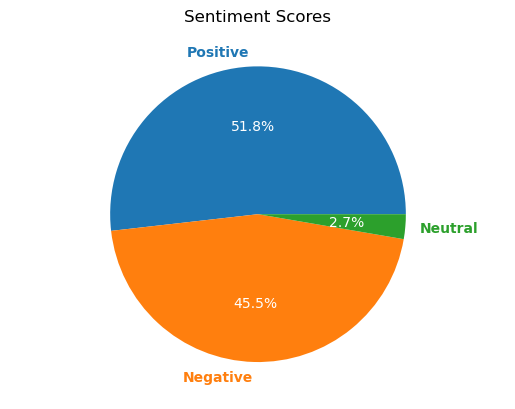

In [14]:
# Visualise data
fig, ax = plt.subplots()
ax.axis('equal')
plt.title('Sentiment Scores')

patches, texts, pcts = ax.pie(
    x=sentiment_scores['count'],
    labels=sentiment_scores['sentiment'].str.title(), 
    autopct='%.1f%%', 
    wedgeprops={'linewidth': 0})

plt.setp(pcts, color='white')
plt.setp(texts, weight='bold')

for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())

In [15]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import text
from sklearn.decomposition import LatentDirichletAllocation, NMF
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import nltk
import re

In [62]:
# Remove numbers
def preprocess(text):
    
    text = re.sub(r'\b\d+\b', '', text)
    return text

def topic_model_lda(data, max_df, min_df, n_components, additional_stop_words=[]):

    # Add in additional stop words after further processing
    additional_stop_words = additional_stop_words
    all_stop_words = text.ENGLISH_STOP_WORDS.union(additional_stop_words)

    # Setup count vectorizer to create vocab and dtm
    cv = CountVectorizer(max_df=max_df,
                         min_df=min_df, 
                         stop_words=all_stop_words, 
                         preprocessor=preprocess)

    # Fit transform for document term matrix
    dtm = cv.fit_transform(data)

    # Apply lda fpr topics
    lda = LatentDirichletAllocation(n_components)
    lda.fit(dtm)
    
    topics = {}
    
    # Print out top 15 words for each topic
    for index,topic in enumerate(lda.components_):
        
        topic_words = [cv.get_feature_names_out()[i] for i in topic.argsort()[-15:]]
        topics[index] = topic_words
        
        print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
        print(topic_words)
        print('\n')
    
    return topics

def topic_model_nmf(data, max_df, min_df, n_components, additional_stop_words=[]):
    
    # Add in additional stop words after further processing
    additional_stop_words = additional_stop_words
    all_stop_words = text.ENGLISH_STOP_WORDS.union(additional_stop_words)
    
    # Setup tfidf vectorizer to create vocab and dtm
    tfidf = TfidfVectorizer(max_df=max_df, min_df=min_df, stop_words=all_stop_words)
    
    # Fit transform for document term matrix
    dtm = tfidf.fit_transform(data)
    
    # Apply nmf fpr topics
    nmf = NMF(n_components=6)
    nmf.fit(dtm)
    
    topics = {}
    
    # Print out top 15 words for each topic
    for index,topic in enumerate(nmf.components_):
        
        topic_words = [tfidf.get_feature_names_out()[i] for i in topic.argsort()[-15:]]
        topics[index] = topic_words
        
        print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
        print(topic_words)
        print('\n')
    
    return topics


def show_wordcloud(data):
    
    wordcloud = WordCloud(
        background_color='white',
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

def join_words(topics):
    all_words = [word for words in topics.values() for word in words]
    all_words = list(set(all_words))
    all_words = ' '.join(all_words)
    
    return all_words

In [17]:
df['processed_lowercase'] = df['processed'].str.lower()

first_lda_topics = topic_model_lda(data=df['processed_lowercase'],
                                    max_df=0.85, 
                                    min_df=0.03, 
                                    n_components=6)

THE TOP 15 WORDS FOR TOPIC #0
['heathrow', 'minutes', 'arrived', 'boarding', 'staff', 'gate', 'late', 'delayed', 'check', 'hours', 'london', 'plane', 'time', 'hour', 'flight']


THE TOP 15 WORDS FOR TOPIC #1
['day', 'airport', 'hours', 'refund', 'airline', 'booked', 'cancelled', 'told', 'london', 'service', 'customer', 'airways', 'british', 'ba', 'flight']


THE TOP 15 WORDS FOR TOPIC #2
['economy', 'airways', 'people', 'british', 'asked', 'meal', 'seats', 'like', 'london', 'food', 'ba', 'seat', 'service', 'business', 'class']


THE TOP 15 WORDS FOR TOPIC #3
['return', 'aisle', 'booking', 'years', 'pay', 'wife', 'just', 'row', 'premium', 'economy', 'paid', 'flight', 'seats', 'seat', 'ba']


THE TOP 15 WORDS FOR TOPIC #4
['drinks', 'comfortable', 'meal', 'seats', 'economy', 'time', 'seat', 'ba', 'london', 'cabin', 'service', 'good', 'food', 'crew', 'flight']


THE TOP 15 WORDS FOR TOPIC #5
['bag', 'passengers', 'food', 'crew', 'time', 'cabin', 'good', 'boarding', 'service', 'lounge', 'c

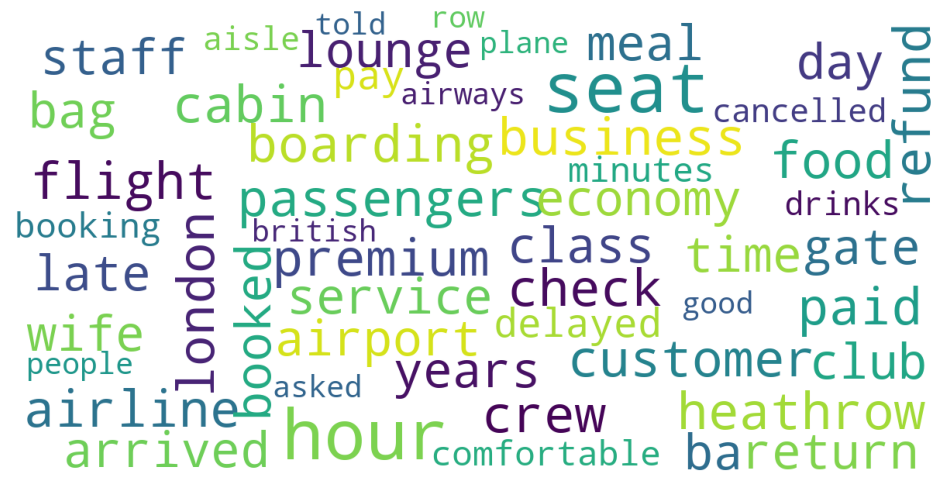

In [55]:
all_words = join_words(first_lda_topics)
show_wordcloud(all_words)

In [57]:
second_lda_topics = topic_model_lda(data=df['processed_lowercase'],
                                     max_df=0.85, 
                                     min_df=0.03, 
                                     n_components=6, 
                                     additional_stop_words=['ba', 'like'])

THE TOP 15 WORDS FOR TOPIC #0
['time', 'voucher', 'told', 'london', 'travel', 'booking', 'airline', 'cancelled', 'refund', 'booked', 'service', 'customer', 'airways', 'british', 'flight']


THE TOP 15 WORDS FOR TOPIC #1
['cabin', 'entertainment', 'premium', 'airways', 'british', 'airline', 'economy', 'service', 'london', 'food', 'flight', 'seat', 'seats', 'business', 'class']


THE TOP 15 WORDS FOR TOPIC #2
['nice', 'experience', 'passengers', 'lhr', 'check', 'boarding', 'time', 'crew', 'cabin', 'service', 'club', 'lounge', 'food', 'good', 'flight']


THE TOP 15 WORDS FOR TOPIC #3
['great', 'food', 'check', 'friendly', 'minutes', 'boarding', 'good', 'cabin', 'service', 'staff', 'heathrow', 'london', 'time', 'crew', 'flight']


THE TOP 15 WORDS FOR TOPIC #4
['row', 'choice', 'just', 'food', 'ok', 'offered', 'seats', 'premium', 'meal', 'cabin', 'flight', 'crew', 'service', 'economy', 'seat']


THE TOP 15 WORDS FOR TOPIC #5
['arrived', 'baggage', 'heathrow', 'day', 'hour', 'check', 'plane

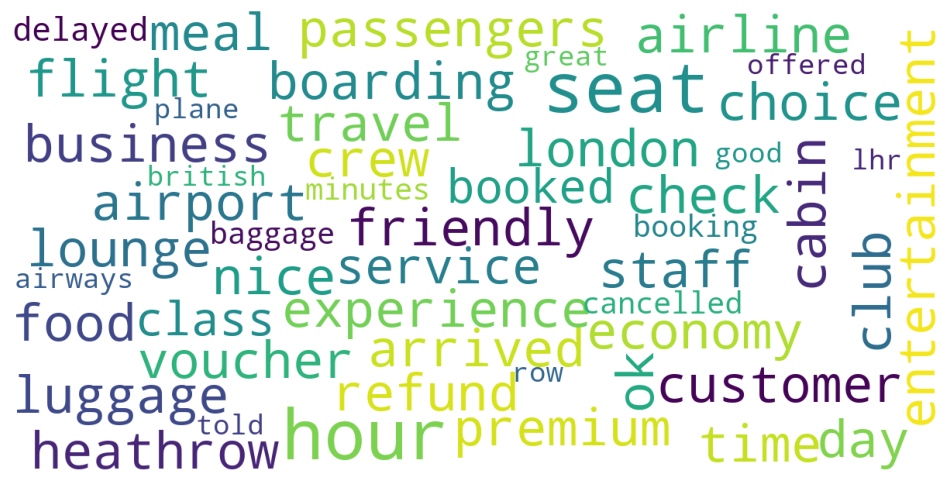

In [58]:
all_words = join_words(second_lda_topics)
show_wordcloud(all_words)

In [65]:
first_nmf_topics = topic_model_nmf(data=df['processed_lowercase'],
                                    max_df=0.90,
                                    min_df=0.05 ,
                                    n_components=6)

THE TOP 15 WORDS FOR TOPIC #0
['really', 'friendly', 'new', 'great', 'excellent', 'lounge', 'time', 'flight', 'club', 'service', 'ba', 'food', 'cabin', 'crew', 'good']


THE TOP 15 WORDS FOR TOPIC #1
['return', 'email', 'day', 'phone', 'travel', 'booking', 'told', 'flights', 'service', 'booked', 'customer', 'flight', 'refund', 'cancelled', 'ba']


THE TOP 15 WORDS FOR TOPIC #2
['staff', 'seating', 'club', 'like', 'poor', 'food', 'passengers', 'service', 'worst', 'middle', 'lounge', 'seats', 'ba', 'business', 'class']


THE TOP 15 WORDS FOR TOPIC #3
['ticket', 'staff', 'like', 'different', 'great', 'travel', 'worst', 'experience', 'airlines', 'london', 'service', 'customer', 'airline', 'british', 'airways']


THE TOP 15 WORDS FOR TOPIC #4
['airport', 'gate', 'time', 'london', 'heathrow', 'bag', 'hour', 'plane', 'luggage', 'hours', 'minutes', 'delayed', 'check', 'staff', 'flight']


THE TOP 15 WORDS FOR TOPIC #5
['paid', 'plane', 'uncomfortable', 'food', 'just', 'room', 'extra', 'enterta

C:\Users\Hoawen\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


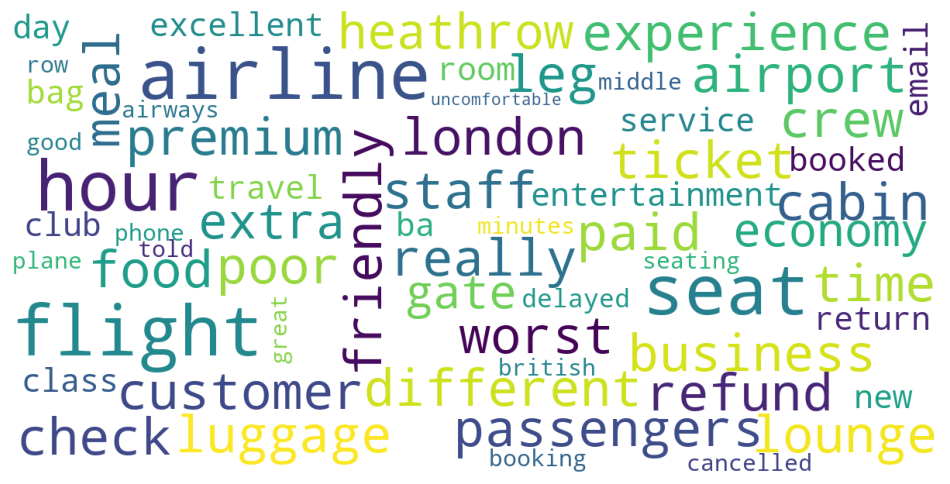

In [66]:
all_words = join_words(first_nmf_topics)
show_wordcloud(all_words)